In [0]:
#Import libraries
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
import pandas as pd
from google.colab.patches import cv2_imshow
from keras.models import load_model
import warnings
warnings.filterwarnings("ignore")

In [0]:
#Mount to google drive for easy access to files for import/export
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!pip install mtcnn

In [0]:
from mtcnn.mtcnn import MTCNN
def detectFace(pic, faceDetected):
  detector = MTCNN()
  pixels = pic
  results = detector.detect_faces(pixels)
  if len(results)!=0:
    x1, y1, width, height = results[0]['box']
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    face = pixels[y1:y2, x1:x2]
    faceDetected = True
    return face, faceDetected
  else:
    return np.nan, faceDetected

True


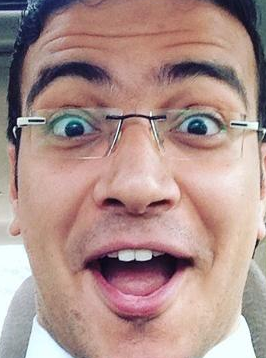

In [0]:
filename = '/content/gdrive/My Drive/Google_Collab/original images/AbdH_00134_m_24_o_fr_nc_sr_2016_1_e0_nl_o.jpg'
pic = cv2.imread(filename, 1)
detection = False
face, detection = detectFace(pic,detection)
print(detection)
cv2_imshow(face)

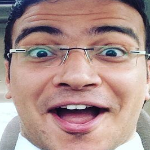

In [0]:
dim = (150,150)
face = cv2.resize(face, dim)
cv2_imshow(face)

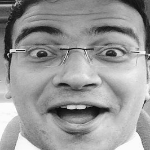

In [0]:
faceGray = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
cv2_imshow(faceGray)

In [0]:
x = (faceGray-faceGray.mean())/faceGray.std()
x = np.array(x,dtype=np.float32)
x.shape

(150, 150)

In [0]:
x = x.reshape(1, 150, 150, 1)
x.shape

(1, 150, 150, 1)

In [0]:
checkpointPathEmotion = '/content/gdrive/My Drive/Google_Collab/CNNModelsEmotion/Hyperas/BatchNormalisation/Best_0.673_0.765.h5'
testEmotion = load_model(checkpointPathEmotion)

In [0]:
testEmotion.predict(x)

array([[1.1016887e-06, 2.6662014e-03, 9.2988994e-06, 9.9732345e-01]],
      dtype=float32)

In [0]:
checkpointPathGender = '/content/gdrive/My Drive/Google_Collab/CNNModelsGender/cnnModelGender1.h5'
testGender = load_model(checkpointPathGender)

In [0]:
testGender.predict(x)

array([[0.98952687]], dtype=float32)

In [0]:
checkpointPathAge = '/content/gdrive/My Drive/Google_Collab/CNNModelsAge/cnnModelAge1.h5'
testAge = load_model(checkpointPathAge)

In [0]:
testAge.predict(x)

array([[27.655207]], dtype=float32)